## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
house = pd.read_csv('train.csv')

In [9]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
print(house.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [12]:
sel_fields = ["MoSold", "YrSold", "SalePrice", "OverallCond", "YearBuilt", "Condition1", "Condition2", "Neighborhood", "ExterCond", "ExterQual", "BsmtUnfSF"]
print(house[sel_fields].head())

   MoSold  YrSold  SalePrice  OverallCond  YearBuilt Condition1 Condition2  \
0       2    2008     208500            5       2003       Norm       Norm   
1       5    2007     181500            8       1976      Feedr       Norm   
2       9    2008     223500            5       2001       Norm       Norm   
3       2    2006     140000            5       1915       Norm       Norm   
4      12    2008     250000            5       2000       Norm       Norm   

  Neighborhood ExterCond ExterQual  BsmtUnfSF  
0      CollgCr        TA        Gd        150  
1      Veenker        TA        TA        284  
2      CollgCr        TA        Gd        434  
3      Crawfor        TA        TA        540  
4      NoRidge        TA        Gd        490  


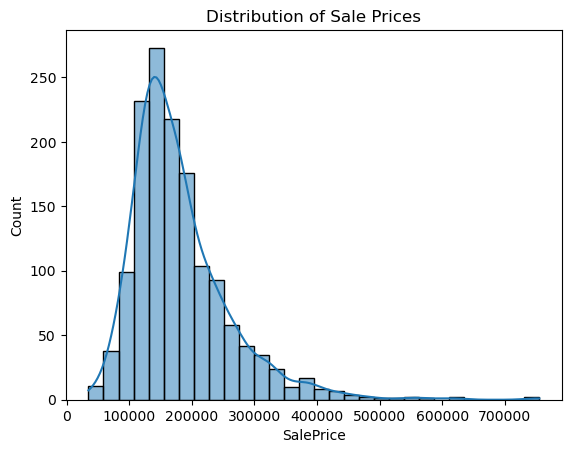

In [13]:
sns.histplot(house['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

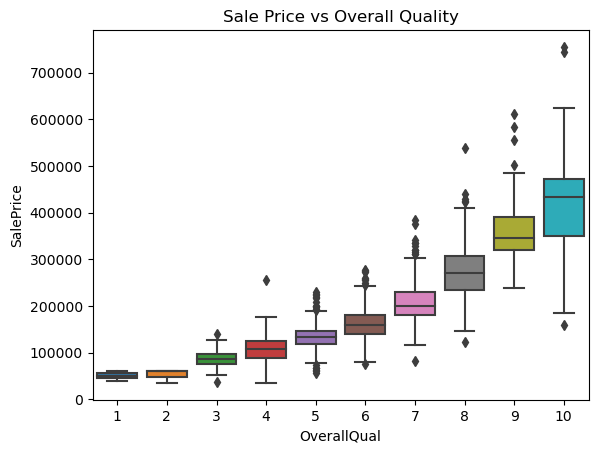

In [14]:
sns.boxplot(x='OverallQual', y='SalePrice', data=house)
plt.title('Sale Price vs Overall Quality')
plt.show()

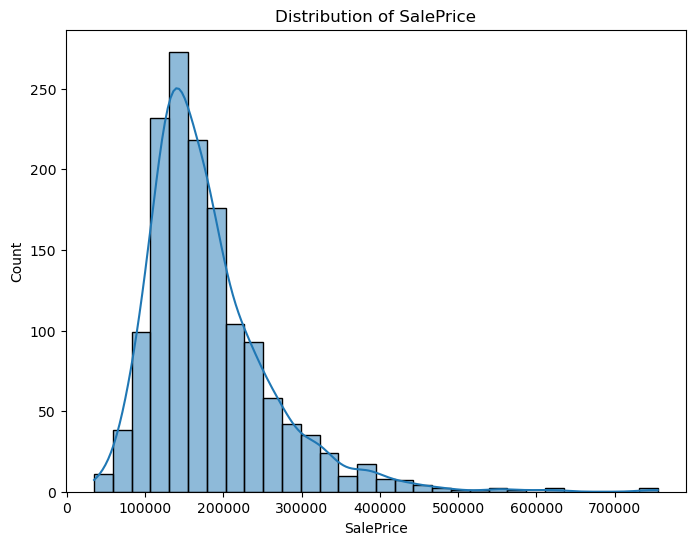

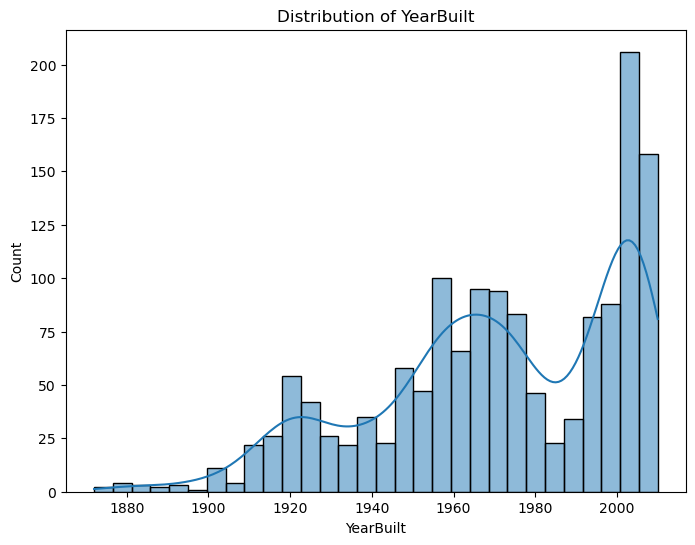

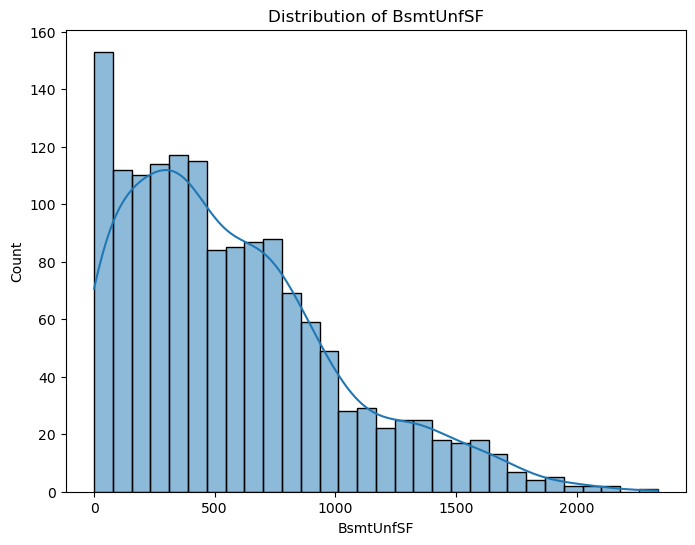

In [15]:
num_fields = ["SalePrice", "YearBuilt", "BsmtUnfSF"]
for field in num_fields:
    plt.figure(figsize=(8, 6))
    sns.histplot(house[field], bins=30, kde=True)
    plt.title(f'Distribution of {field}')
    plt.show()

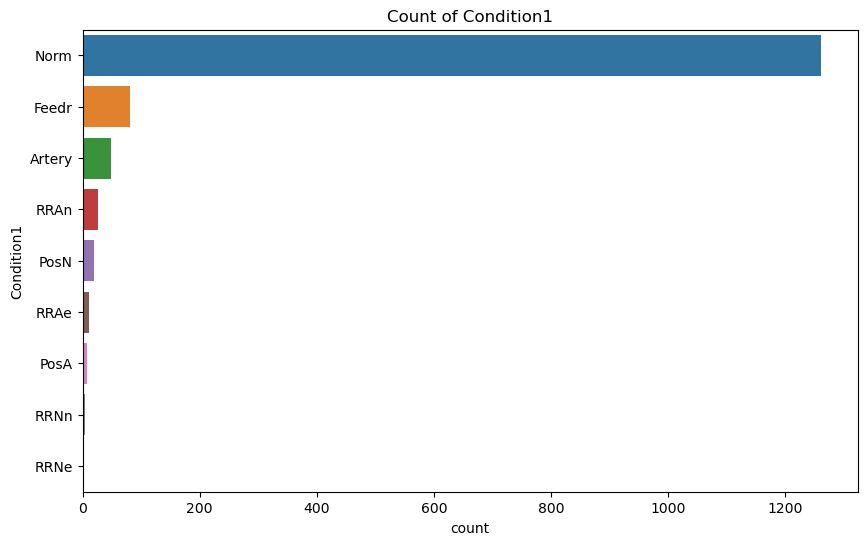

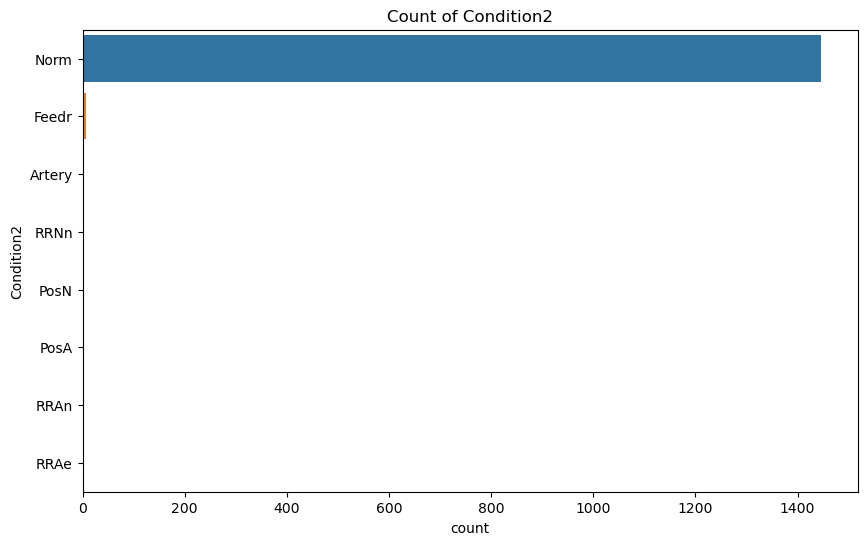

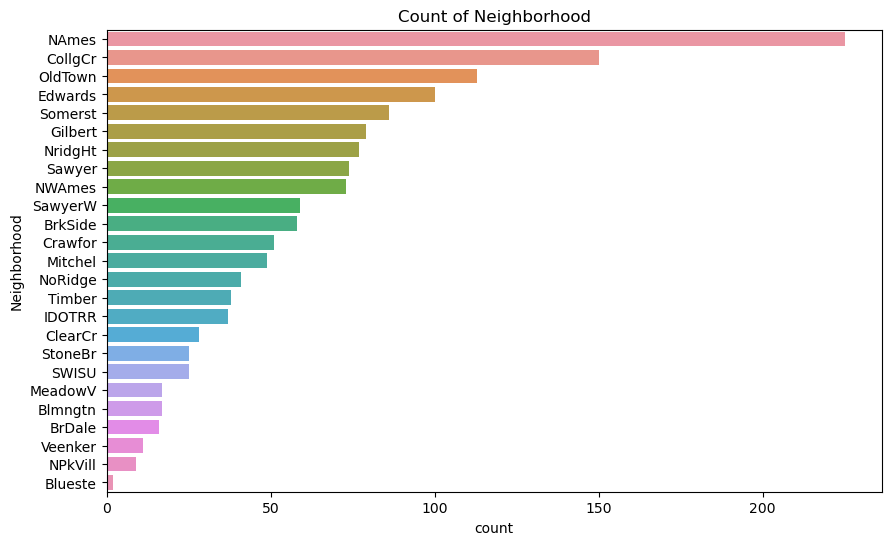

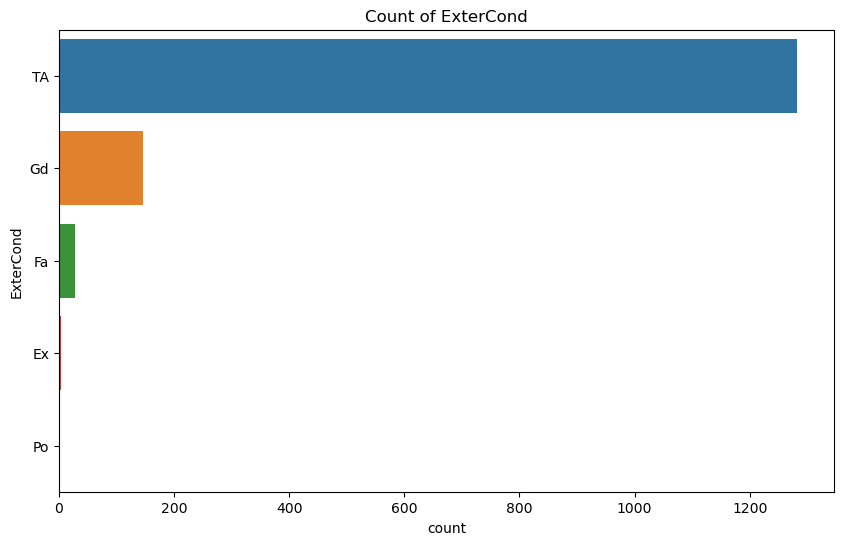

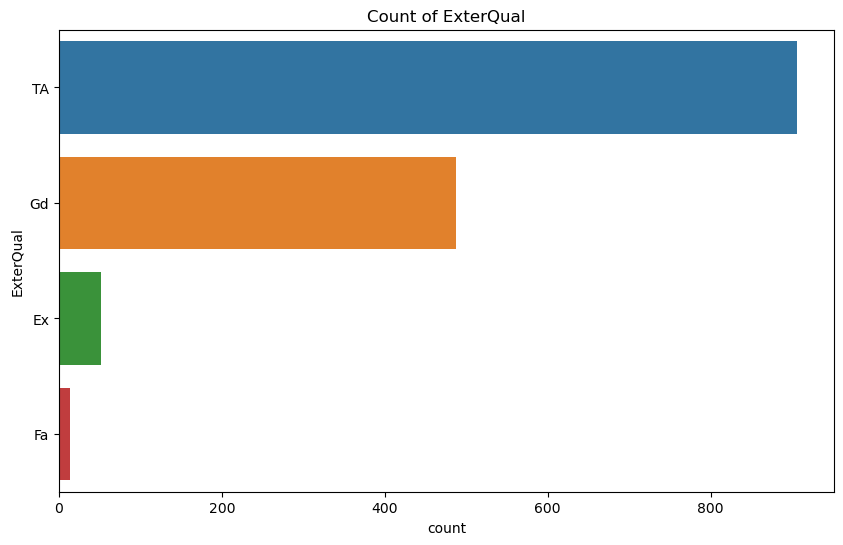

In [16]:
categorical_fields = ["Condition1", "Condition2", "Neighborhood", "ExterCond", "ExterQual"]
for field in categorical_fields:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=house[field], order=house[field].value_counts().index)
    plt.title(f'Count of {field}')
    plt.show()

### 1- What is the month that the biggest amount of houses are sold? What is the month with the least amount?

In [17]:
monthly_sales = house['MoSold'].value_counts().sort_index()
print(monthly_sales)

1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
Name: MoSold, dtype: int64


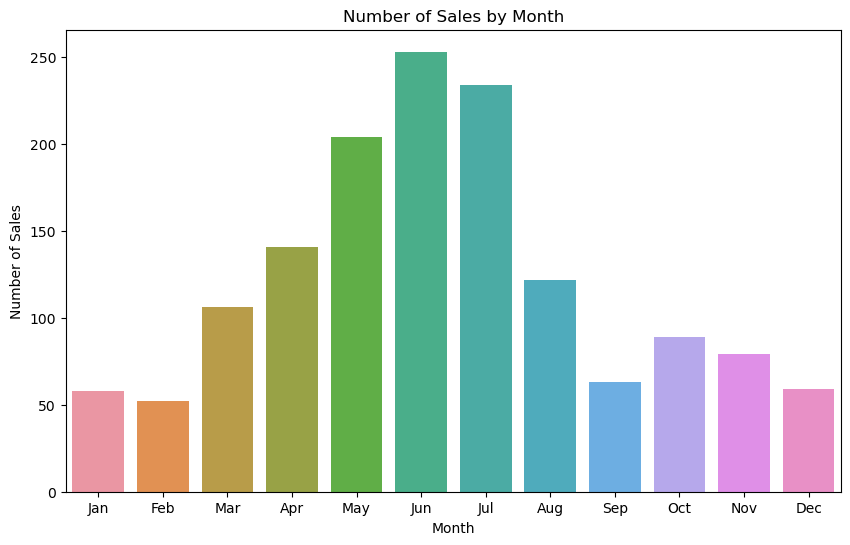

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Number of Sales by Month')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Answer: the months of June have the biggest amount of sales of houses. The month of February has the least.
There is a significant increase of sales between March and August. Maybe due to the end of the Fiscal Year. 

### 2. What is the month with the biggest amount of high quality houses sold (OverallCond: 8, 9, 10)?

In [19]:
high_quality_houses = house[house['OverallCond'].isin([8, 9, 10])]
hq_month_sales = high_quality_houses['MoSold'].value_counts().sort_index()
print(hq_month_sales)

2      1
3      3
4      9
5     19
6     17
7     23
8      5
9      4
10     6
11     2
12     5
Name: MoSold, dtype: int64


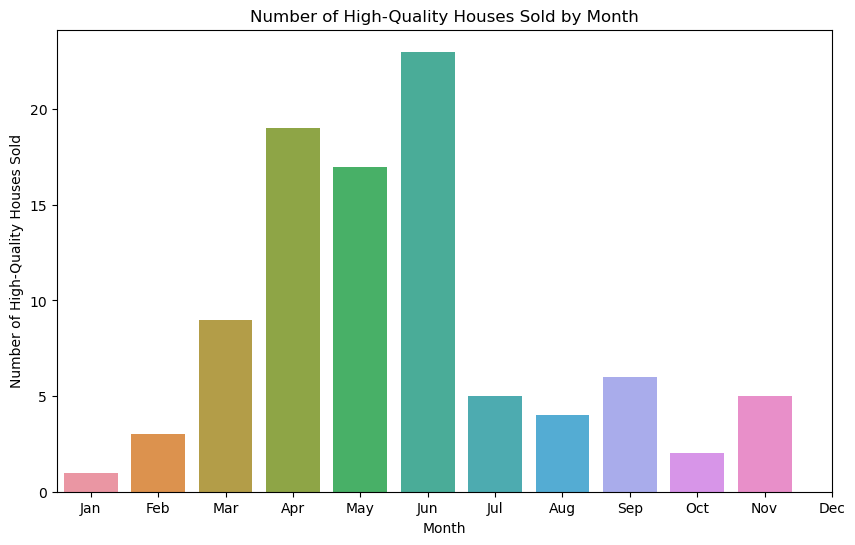

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=hq_month_sales.index, y=hq_month_sales.values)
plt.xlabel('Month')
plt.ylabel('Number of High-Quality Houses Sold')
plt.title('Number of High-Quality Houses Sold by Month')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Answer: the month of June have the biggest amount of sales of high quality houses. 
The high quality houses sales follows the house sales month distribution quite similarly.

### 3. Does the year sold influence the price of houses?

In [21]:
avg_price_per_year = house.groupby('YrSold')['SalePrice'].mean()
print(avg_price_per_year)

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64


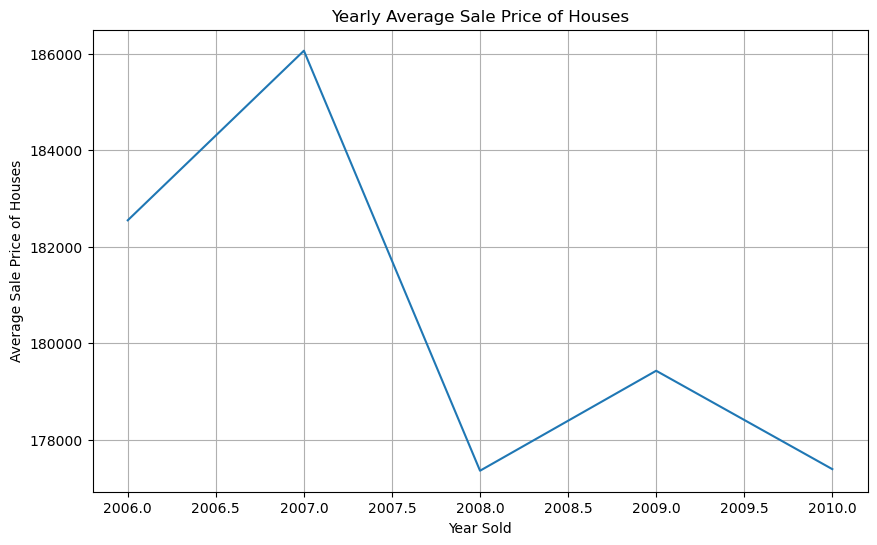

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values)
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price of Houses')
plt.title('Yearly Average Sale Price of Houses')
plt.grid(True)
plt.show()

Answer: The price of houses went up until 2017
    On 2008 it had a significant decrease

### 4. Does YearBuilt has any relation with SalePrice?

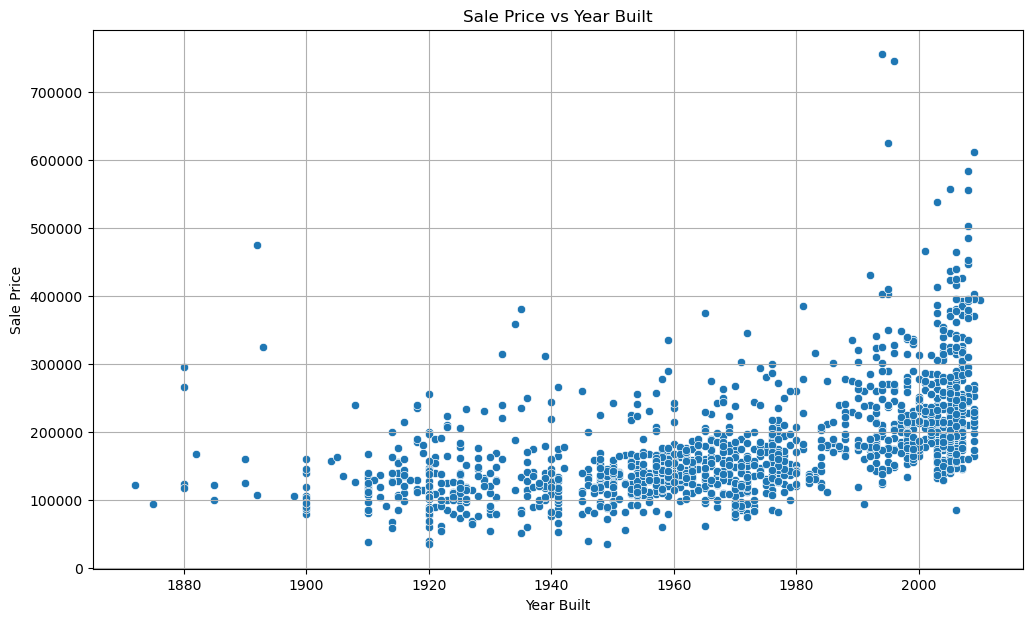

In [23]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=house['YearBuilt'], y=house['SalePrice'])
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [24]:
correlation = house['YearBuilt'].corr(house['SalePrice'])
print(f"The correlation between YearBuilt and SalePrice is {correlation:.2f}")

The correlation between YearBuilt and SalePrice is 0.52


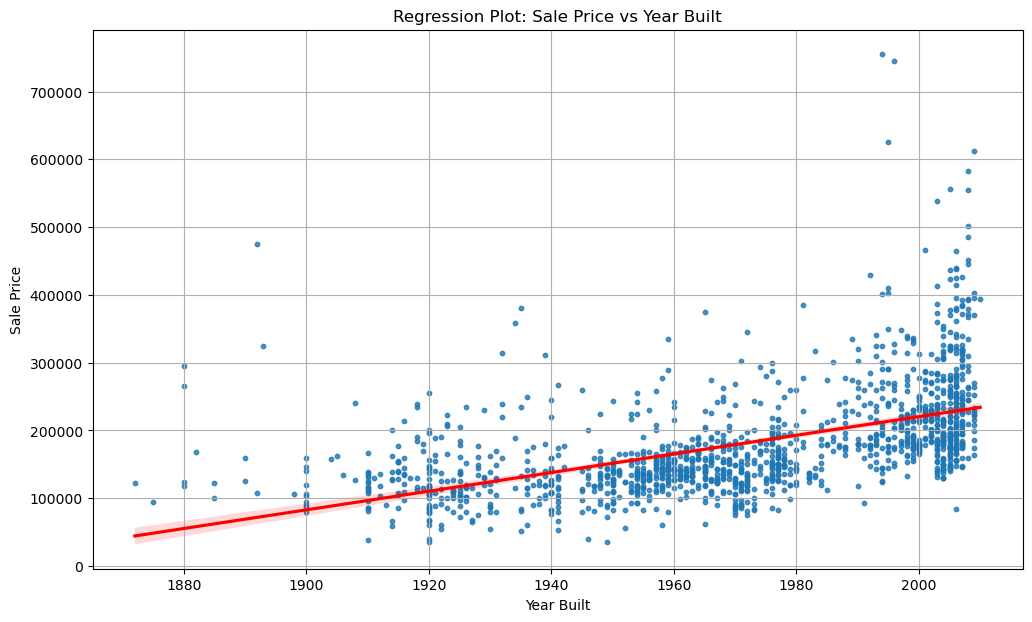

In [25]:
plt.figure(figsize=(12, 7))
sns.regplot(x=house['YearBuilt'], y=house['SalePrice'], scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Plot: Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

Answer: based on the Regression Plot we can see that YearBuilt and SalePrice have a positive linear relation, with a few outliers
The correlation between YearBuilt and SalePrice is 0.52, so they have a moderately strong positive correlation

### 5. Does ExterCond has a relation with SalePrice?

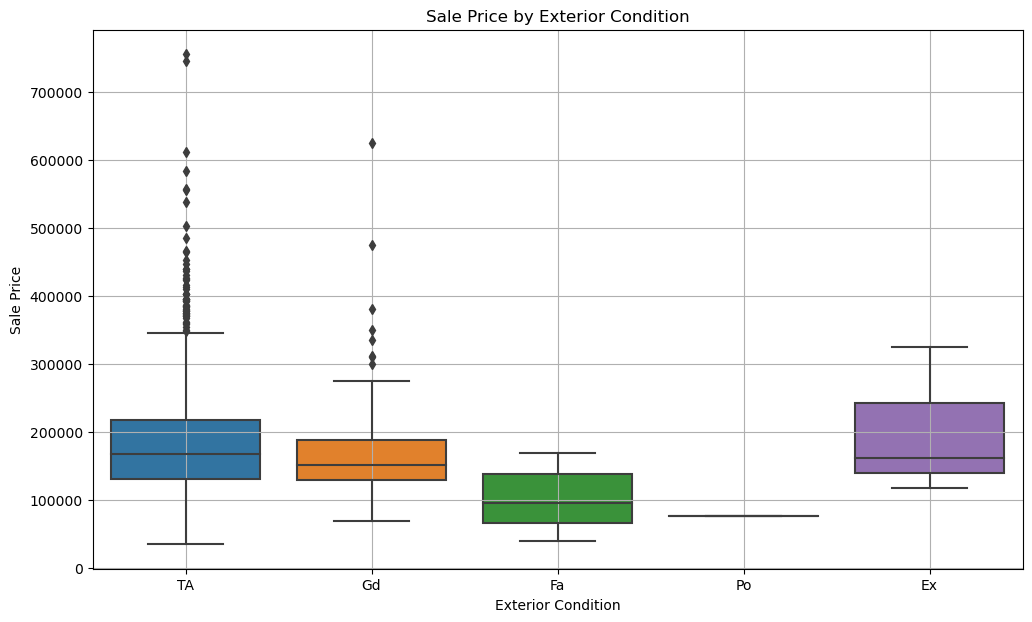

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=house['ExterCond'], y=house['SalePrice'])
plt.title('Sale Price by Exterior Condition')
plt.xlabel('Exterior Condition')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [27]:
grouped_data = house.groupby('ExterCond')['SalePrice'].describe()
print(grouped_data)

            count           mean            std       min       25%       50%  \
ExterCond                                                                       
Ex            3.0  201333.333333  109235.220205  118000.0  139500.0  161000.0   
Fa           28.0  102595.142857   40094.383940   39300.0   65500.0   95750.0   
Gd          146.0  168897.568493   72608.303632   68400.0  128625.0  151250.0   
Po            1.0   76500.000000            NaN   76500.0   76500.0   76500.0   
TA         1282.0  184034.896256   79806.257233   34900.0  131100.0  167370.0   

                 75%       max  
ExterCond                       
Ex         243000.00  325000.0  
Fa         137750.00  169500.0  
Gd         187375.00  625000.0  
Po          76500.00   76500.0  
TA         217334.25  755000.0  


The number of Excelent condition exteriors (Ex) is too small in relation to the other ones, the same applies tp the poor conditional exteriors (Po).
The TA (Average/typical) conatains significantly more data, what makes hard to infer anny relationship between ExterCond and SalePrice

### 6. What's the neiborhood with the biggest Sale Price mean?

In [30]:
high_price_neiborhood = house.groupby('Neighborhood')['SalePrice'].mean()
print(high_price_neiborhood)


Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64


In [36]:
max_neiborhood = high_price_neiborhood.idxmax()
max_mean_price = high_price_neiborhood.max()
print(f'The neiborhood with the biggest mean sale price is {max_neiborhood} with a mean price of ${max_mean_price:.2f}')

The neiborhood with the biggest mean sale price is NoRidge with a mean price of $335295.32
